# GLDS-366 GWAS Processed Associations
Data Exploration and Preprocessing

## Setup

In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [49]:
data_path = os.path.join(os.getcwd(), '../data')
glds_366_gwas_path = os.path.join(data_path, "GLDS-366_GWAS_processed_associations.csv")

gwas_df = pd.read_csv(glds_366_gwas_path)

gwas_df.head()

/var/folders/bm/2p55x4d9111982mgcnj9dcm80000gn/T/ipykernel_29951/37247090.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gwas_df = pd.read_csv(glds_366_gwas_path)


,chromosome,position.b38.,Bgd_Si 350 MeV/n_4,FociPerGy_Si 350 MeV/n_4,Bgd_Si 350 MeV/n_8,FociPerGy_Si 350 MeV/n_8,Bgd_Si 350 MeV/n_24,FociPerGy_Si 350 MeV/n_24,Bgd_Si 350 MeV/n_48,FociPerGy_Si 350 MeV/n_48,...,Bgd_Fe 600 MeV/n_24.1,FociPerGy_Fe 600 MeV/n_24.1,Bgd_Fe 600 MeV/n_48.1,FociPerGy_Fe 600 MeV/n_48.1,Bgd_X-ray_4.1,FociPerGy_X-ray_4.1,Bgd_X-ray_24.1,FociPerGy_X-ray_24.1,Bgd_X-ray_48.1,FociPerGy_X-ray_48.1
0,1,3010274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3064340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3124559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3126982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3195649,0.631917,0.32043,0.405416,0.080308,0.686654,0.143159,0.787943,0.35966,...,0.890898,0.767476,0.415237,0.559335,0.886583,0.633618,0.728212,0.447264,1.0,0.348412


## Data Exploration and Preprocessing

### Before Preprocessing Data Exploration

In [50]:
gwas_df.shape

(134593, 64)

In [80]:
def summarize_raw_data(s):
    '''
    Summarize the data: range of values, number of NaNs, etc
    '''
    non_numeric = s[~s.apply(lambda x: np.isreal(x) and not pd.isnull(x))]
    numeric_entries = s[s.apply(lambda x: np.isreal(x) and not pd.isnull(x))]
    
    if s.dtype in ['float64', 'int64'] or not numeric_entries.empty:
        return pd.Series({
            'data_type': s.dtype,
            'min': numeric_entries.min(),
            'max': numeric_entries.max(),
            'NaN_count': s.isna().sum().astype(int),
            'numeric_count': len(numeric_entries),
            'non_numeric_count': len(non_numeric),
            'unique_non_numeric_values': non_numeric.unique()
        })
    else:
        return pd.Series({
            'data_type': s.dtype,
            'numeric_count': 0,
            'non_numeric_count': len(non_numeric),
            'unique_non_numeric_values': non_numeric.unique(),
            'NaN_count': s.isna().sum().astype(int)
        })

In [53]:
summary = gwas_df.apply(summarize_raw_data)

summary.to_csv('raw_summary.csv')
summary

,chromosome,position.b38.,Bgd_Si 350 MeV/n_4,FociPerGy_Si 350 MeV/n_4,Bgd_Si 350 MeV/n_8,FociPerGy_Si 350 MeV/n_8,Bgd_Si 350 MeV/n_24,FociPerGy_Si 350 MeV/n_24,Bgd_Si 350 MeV/n_48,FociPerGy_Si 350 MeV/n_48,...,Bgd_Fe 600 MeV/n_24.1,FociPerGy_Fe 600 MeV/n_24.1,Bgd_Fe 600 MeV/n_48.1,FociPerGy_Fe 600 MeV/n_48.1,Bgd_X-ray_4.1,FociPerGy_X-ray_4.1,Bgd_X-ray_24.1,FociPerGy_X-ray_24.1,Bgd_X-ray_48.1,FociPerGy_X-ray_48.1
data_type,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
min,1,165,0.00001,0.000361,0.000009,0.000534,0.000016,0.000772,0.000012,0.000083,...,0.000012,0.0,0.000002,0.0,0.0,0.0,0.000001,0.000006,0.000002,0.000037
max,18,195360017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NaN_count,0,0,78402,78402,78402,78402,78402,78402,78402,78402,...,78402,78402,78402,78402,78402,78402,78402,78402,78402,78402
numeric_count,122880,134593,56191,56191,56191,56191,56191,56191,56191,56191,...,56191,56191,56191,56191,56191,56191,56191,56191,56191,56191
non_numeric_count,11713,0,78402,78402,78402,78402,78402,78402,78402,78402,...,78402,78402,78402,78402,78402,78402,78402,78402,78402,78402
unique_non_numeric_values,"[18, 19, M, X, Y]",[],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],...,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]


### Data Preprocessing

In [115]:
gwas_df_clean = gwas_df.copy()

In [116]:
# Drop columns where all values are NaN
cols_to_drop = gwas_df_clean.columns[np.where(gwas_df.isna().all())]
gwas_df_clean = gwas_df_clean.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop.values)

Dropped columns: ['Bgd_X-ray_8' 'FociPerGy_X-ray_8']


In [117]:
# Drop rows where any value is NaN
rows_to_drop = gwas_df_clean.index[np.where(gwas_df_clean.isna().any(axis=1))]
gwas_df_clean = gwas_df_clean.drop(index=rows_to_drop)
print("Dropped rows:", rows_to_drop.values)

Dropped rows: [     0      1      2 ... 134590 134591 134592]


In [118]:
gwas_df_clean.shape

(56191, 62)

In [119]:
def chromosome_to_numer(x):
    '''
    Convert non-numeric chromosome values to numeric
    '''
    char_dict = {
        "M": 20,
        "X": 21,
        "Y": 22
    }
    return int(char_dict.get(x, x))

In [144]:
gwas_df_clean['chromosome'] = gwas_df_clean['chromosome'].apply(chromosome_to_numer)

gwas_chromosomes_numer = gwas_df_clean['chromosome']

In [145]:
# Combine chromosome and position into a single column
gwas_df_clean['chromosome_position'] = gwas_df_clean['chromosome'].astype(str) + "-" + gwas_df_clean['position.b38.'].astype(str)

# Drop the original columns
gwas_df_clean.drop(['chromosome', 'position.b38.'], axis=1, inplace=True)

gwas_df_clean

,Bgd_Si 350 MeV/n_4,FociPerGy_Si 350 MeV/n_4,Bgd_Si 350 MeV/n_8,FociPerGy_Si 350 MeV/n_8,Bgd_Si 350 MeV/n_24,FociPerGy_Si 350 MeV/n_24,Bgd_Si 350 MeV/n_48,FociPerGy_Si 350 MeV/n_48,Bgd_Ar 350 MeV/n_4,FociPerGy_Ar 350 MeV/n_4,...,FociPerGy_Fe 600 MeV/n_24.1,Bgd_Fe 600 MeV/n_48.1,FociPerGy_Fe 600 MeV/n_48.1,Bgd_X-ray_4.1,FociPerGy_X-ray_4.1,Bgd_X-ray_24.1,FociPerGy_X-ray_24.1,Bgd_X-ray_48.1,FociPerGy_X-ray_48.1,chromosome_position
4,0.631917,0.320430,0.405416,0.080308,0.686654,0.143159,0.787943,0.359660,0.910086,0.418768,...,0.767476,0.415237,0.559335,0.886583,0.633618,0.728212,0.447264,1.000000,0.348412,1-3195649
18,0.112535,0.244465,1.000000,0.993470,0.372595,0.730858,0.399397,0.075901,0.194850,0.288899,...,0.073762,0.333783,0.020969,0.619793,0.345707,0.650425,0.728222,0.700155,0.845482,1-3643417
25,0.100432,0.339765,0.028299,0.182238,0.263531,0.724126,0.507723,0.182513,0.314451,0.993368,...,0.056965,0.076597,0.000340,0.012162,0.022321,0.401766,0.113043,0.093289,0.097243,1-3892718
29,0.045614,0.580050,0.417291,0.075824,0.229271,0.044645,0.867677,0.019324,0.199217,0.623127,...,0.018548,0.468068,0.027131,0.795080,0.112827,0.896727,0.387366,0.890601,0.309186,1-4024785
31,0.100432,0.339765,0.028299,0.182238,0.263531,0.724126,0.507723,0.182513,0.314451,0.993368,...,0.056965,0.076597,0.000340,0.012162,0.022321,0.401766,0.113043,0.093289,0.097243,1-4089033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134460,0.657674,0.264208,0.898496,0.424042,0.330298,0.443626,0.443950,0.343830,0.959084,0.475186,...,0.868485,0.000980,0.005755,0.529899,0.674261,0.129332,0.757958,0.581837,0.726181,21-169454751
134461,0.657674,0.264208,0.898496,0.424042,0.330298,0.443626,0.443950,0.343830,0.959084,0.475186,...,0.868485,0.000980,0.005755,0.529899,0.674261,0.129332,0.757958,0.581837,0.726181,21-169454751
134525,0.002201,0.693007,0.048382,0.874800,0.045211,0.942904,0.019672,0.977521,0.000073,0.001810,...,0.000540,0.468565,0.039951,0.955544,0.000110,0.185945,0.010335,0.135990,0.036802,21-169982383
134567,0.001780,0.818153,0.001511,0.648459,0.002875,0.798060,0.075961,0.259845,0.005652,0.816524,...,0.004927,0.944068,0.031971,0.464455,0.001012,0.243422,0.053911,0.480416,0.077141,22-993761


In [146]:
# Reorder columns so that chromosome_position is first
cols = list(gwas_df_clean.columns)
cols.remove('chromosome_position')
cols = ['chromosome_position'] + cols
gwas_df_clean = gwas_df_clean[cols]

gwas_df_clean

,chromosome_position,Bgd_Si 350 MeV/n_4,FociPerGy_Si 350 MeV/n_4,Bgd_Si 350 MeV/n_8,FociPerGy_Si 350 MeV/n_8,Bgd_Si 350 MeV/n_24,FociPerGy_Si 350 MeV/n_24,Bgd_Si 350 MeV/n_48,FociPerGy_Si 350 MeV/n_48,Bgd_Ar 350 MeV/n_4,...,Bgd_Fe 600 MeV/n_24.1,FociPerGy_Fe 600 MeV/n_24.1,Bgd_Fe 600 MeV/n_48.1,FociPerGy_Fe 600 MeV/n_48.1,Bgd_X-ray_4.1,FociPerGy_X-ray_4.1,Bgd_X-ray_24.1,FociPerGy_X-ray_24.1,Bgd_X-ray_48.1,FociPerGy_X-ray_48.1
4,1-3195649,0.631917,0.320430,0.405416,0.080308,0.686654,0.143159,0.787943,0.359660,0.910086,...,0.890898,0.767476,0.415237,0.559335,0.886583,0.633618,0.728212,0.447264,1.000000,0.348412
18,1-3643417,0.112535,0.244465,1.000000,0.993470,0.372595,0.730858,0.399397,0.075901,0.194850,...,0.149158,0.073762,0.333783,0.020969,0.619793,0.345707,0.650425,0.728222,0.700155,0.845482
25,1-3892718,0.100432,0.339765,0.028299,0.182238,0.263531,0.724126,0.507723,0.182513,0.314451,...,0.180627,0.056965,0.076597,0.000340,0.012162,0.022321,0.401766,0.113043,0.093289,0.097243
29,1-4024785,0.045614,0.580050,0.417291,0.075824,0.229271,0.044645,0.867677,0.019324,0.199217,...,0.339011,0.018548,0.468068,0.027131,0.795080,0.112827,0.896727,0.387366,0.890601,0.309186
31,1-4089033,0.100432,0.339765,0.028299,0.182238,0.263531,0.724126,0.507723,0.182513,0.314451,...,0.180627,0.056965,0.076597,0.000340,0.012162,0.022321,0.401766,0.113043,0.093289,0.097243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134460,21-169454751,0.657674,0.264208,0.898496,0.424042,0.330298,0.443626,0.443950,0.343830,0.959084,...,0.607831,0.868485,0.000980,0.005755,0.529899,0.674261,0.129332,0.757958,0.581837,0.726181
134461,21-169454751,0.657674,0.264208,0.898496,0.424042,0.330298,0.443626,0.443950,0.343830,0.959084,...,0.607831,0.868485,0.000980,0.005755,0.529899,0.674261,0.129332,0.757958,0.581837,0.726181
134525,21-169982383,0.002201,0.693007,0.048382,0.874800,0.045211,0.942904,0.019672,0.977521,0.000073,...,0.070924,0.000540,0.468565,0.039951,0.955544,0.000110,0.185945,0.010335,0.135990,0.036802
134567,22-993761,0.001780,0.818153,0.001511,0.648459,0.002875,0.798060,0.075961,0.259845,0.005652,...,0.310689,0.004927,0.944068,0.031971,0.464455,0.001012,0.243422,0.053911,0.480416,0.077141


### Post Preprocessing Data Exploration

In [147]:
def summarize_clean_data(s):
    '''
    Summarize the data for numeric columns after preprocessing
    '''
    numeric_entries = s[s.apply(lambda x: np.isreal(x) and not pd.isnull(x))]
    
    if s.dtype in ['float64', 'int64'] or not numeric_entries.empty:
        return pd.Series({
            'min': numeric_entries.min(),
            'max': numeric_entries.max(),
            'mean': numeric_entries.mean(),
            'mode': numeric_entries.mode().iloc[0] if not numeric_entries.mode().empty else None,
            'std_dev': numeric_entries.std()
        })

In [148]:
summary_clean = gwas_df_clean.drop(columns=['chromosome_position']).apply(summarize_clean_data)
summary_clean.to_csv('clean_summary.csv')
summary_clean.head()

,Bgd_Si 350 MeV/n_4,FociPerGy_Si 350 MeV/n_4,Bgd_Si 350 MeV/n_8,FociPerGy_Si 350 MeV/n_8,Bgd_Si 350 MeV/n_24,FociPerGy_Si 350 MeV/n_24,Bgd_Si 350 MeV/n_48,FociPerGy_Si 350 MeV/n_48,Bgd_Ar 350 MeV/n_4,FociPerGy_Ar 350 MeV/n_4,...,Bgd_Fe 600 MeV/n_24.1,FociPerGy_Fe 600 MeV/n_24.1,Bgd_Fe 600 MeV/n_48.1,FociPerGy_Fe 600 MeV/n_48.1,Bgd_X-ray_4.1,FociPerGy_X-ray_4.1,Bgd_X-ray_24.1,FociPerGy_X-ray_24.1,Bgd_X-ray_48.1,FociPerGy_X-ray_48.1
min,0.000010,0.000361,0.000009,0.000534,0.000016,0.000772,0.000012,0.000083,0.000001,2.070000e-09,...,0.000012,6.450000e-08,0.000002,8.610000e-08,4.340000e-07,2.350000e-07,9.310000e-07,0.000006,0.000002,0.000037
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000
mean,0.343137,0.440440,0.320600,0.401472,0.356843,0.477723,0.405824,0.412428,0.337009,3.359445e-01,...,0.404636,2.872470e-01,0.333442,3.017794e-01,3.305234e-01,2.857144e-01,3.101589e-01,0.320576,0.383779,0.330311
mode,0.608935,0.030156,1.000000,1.000000,0.252222,1.000000,0.733009,1.000000,0.632333,1.000000e+00,...,0.783011,1.000000e+00,0.771657,5.355463e-01,1.992884e-01,9.502754e-01,4.666722e-01,1.000000,1.000000,1.000000
std_dev,0.308059,0.288565,0.303508,0.296976,0.302509,0.289454,0.308612,0.307294,0.305662,3.164662e-01,...,0.304494,3.022469e-01,0.304774,3.051444e-01,3.046010e-01,3.060968e-01,2.983527e-01,0.310632,0.315235,0.308801


In [149]:
# Setup for data visualization
sns.set(style="whitegrid")

n_cols = 5
n_rows = math.ceil(len(numeric_cols.columns) / n_cols)

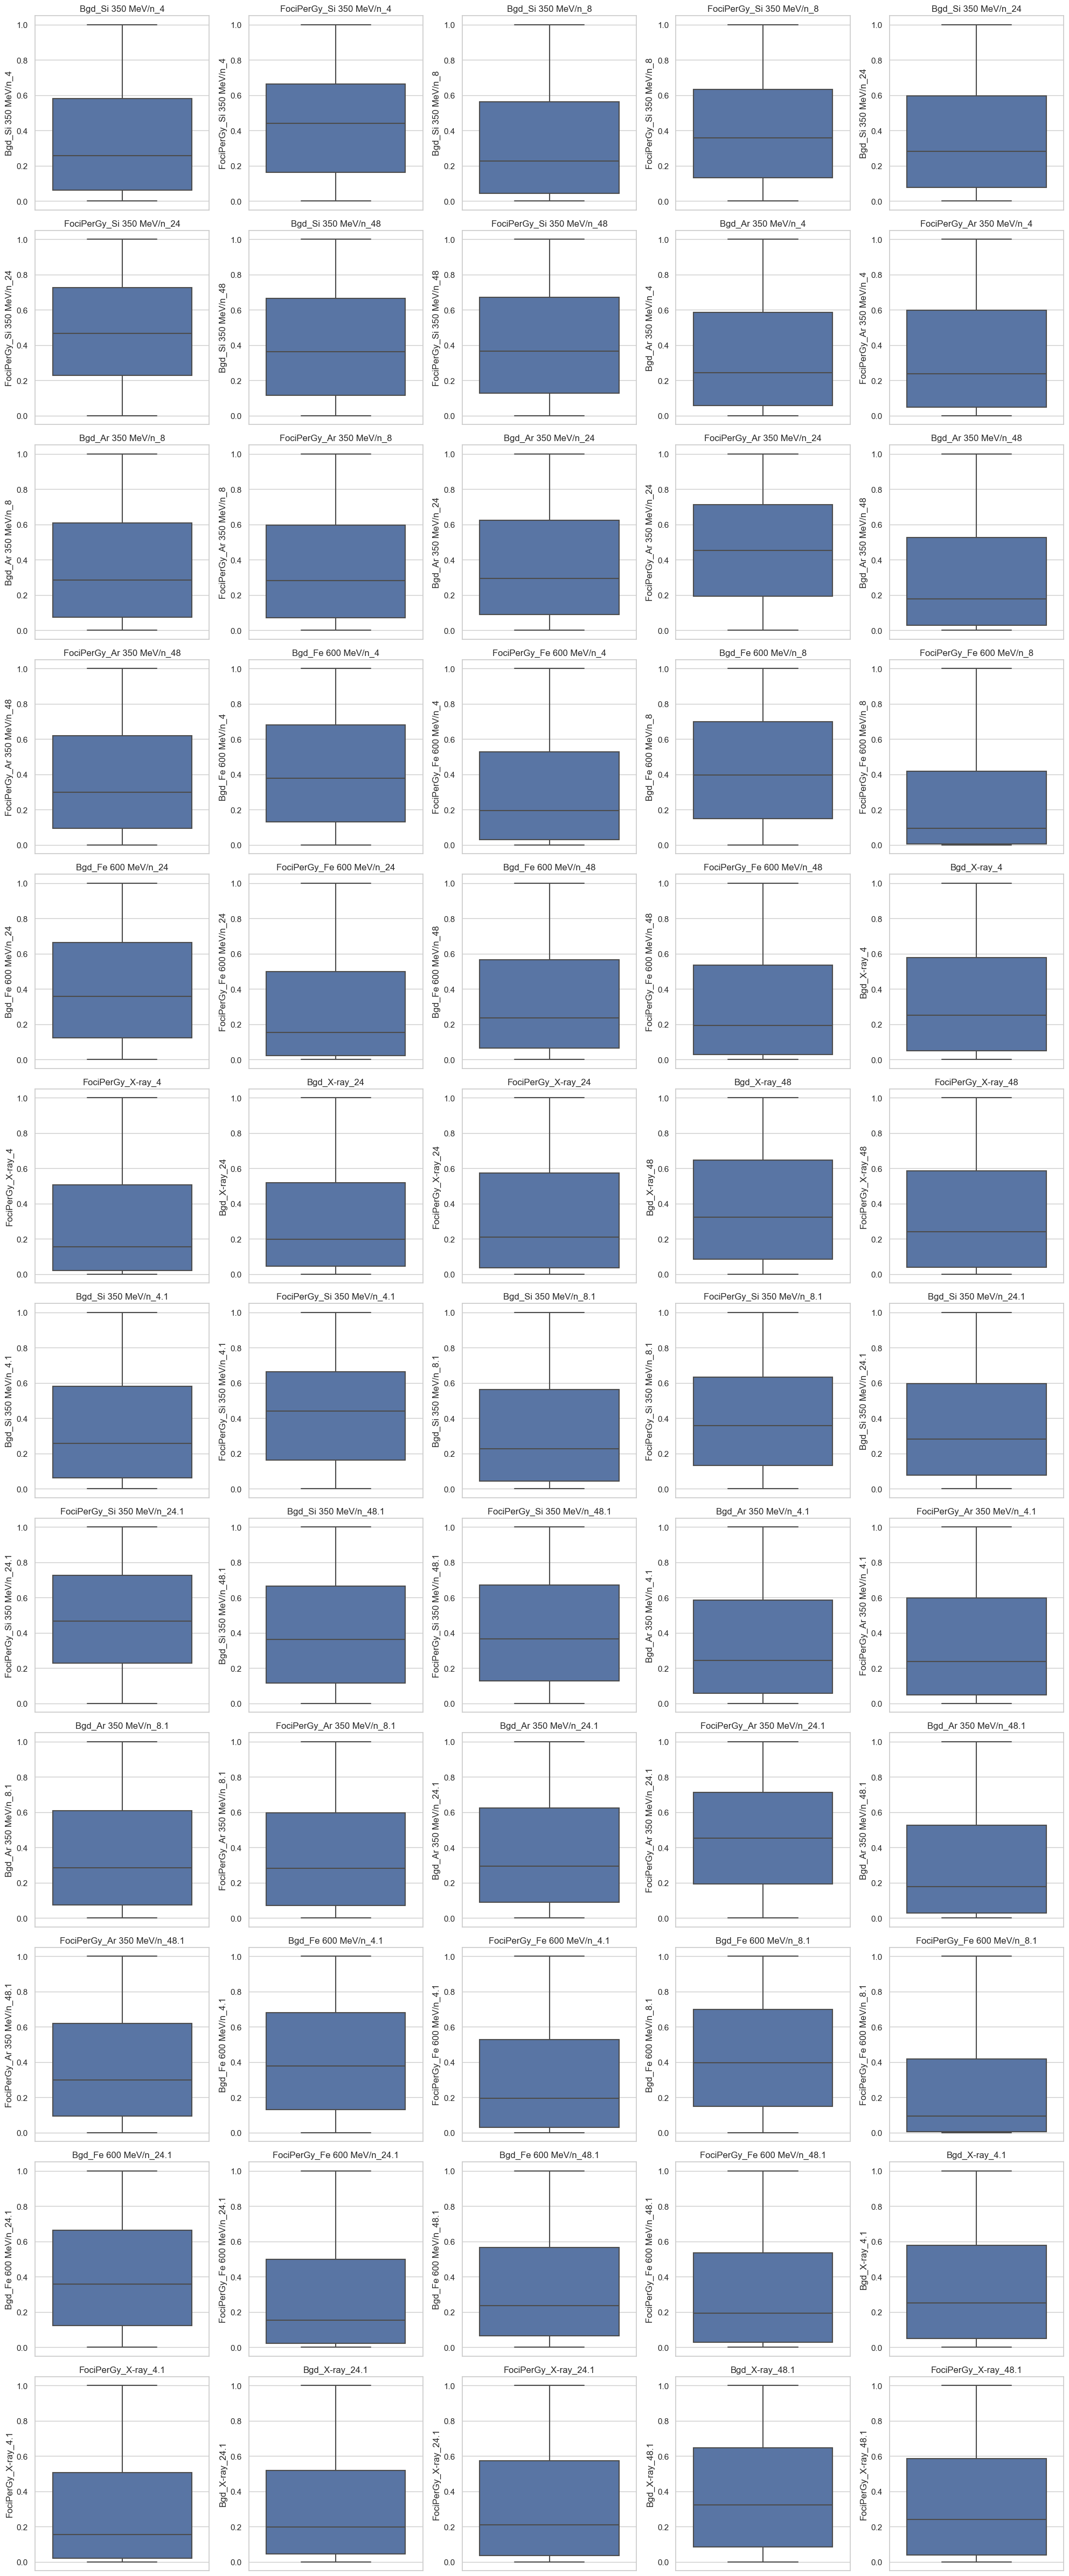

In [150]:
# Visualize data in box and whisker plots
plt.figure(figsize=(20, 4 * n_rows))

numeric_cols = gwas_df_clean.select_dtypes(include=['float64', 'int64'])

for idx, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=numeric_cols[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.savefig("clean_boxplots.png")

/var/folders/bm/2p55x4d9111982mgcnj9dcm80000gn/T/ipykernel_29951/3665108278.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averages = gwas_df_clean.mean()


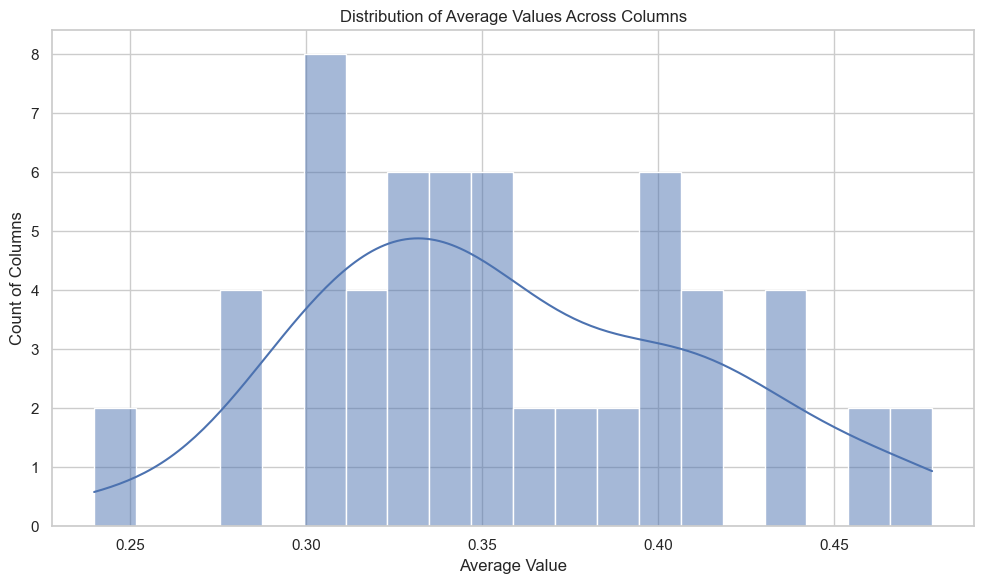

In [151]:
# Visualize data as a histogram of the mean values across columns
averages = gwas_df_clean.mean()

plt.figure(figsize=(10, 6))
sns.histplot(averages, bins=20, kde=True)
plt.title('Distribution of Average Values Across Columns')
plt.xlabel('Average Value')
plt.ylabel('Count of Columns')

plt.tight_layout()
plt.savefig("clean_average_histogram_20bins.png")
plt.show()

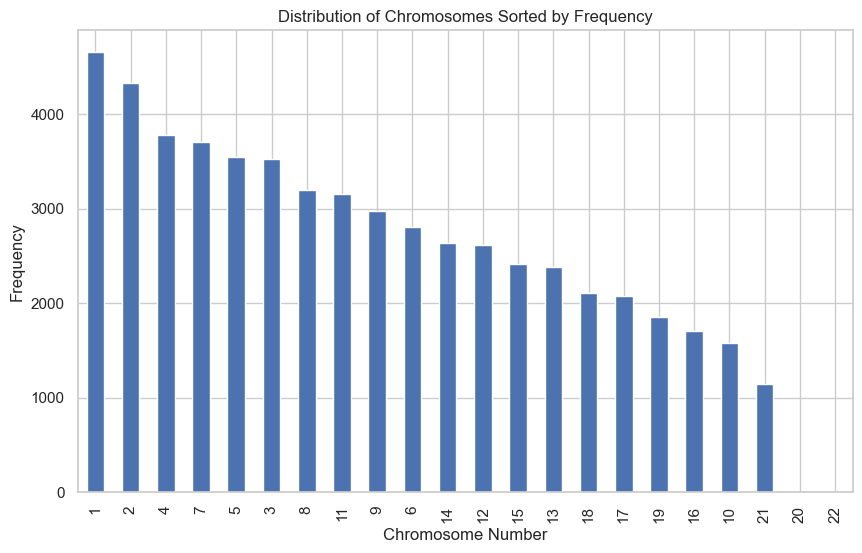

In [133]:
# Visualize distribution of Chromosome values
chromosome_val_counts = gwas_chromosomes_numer.value_counts()
chromosome_val_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Chromosomes Sorted by Frequency")
plt.xlabel("Chromosome Number")
plt.ylabel("Frequency")
plt.savefig("chromosome_distribution_sorted.png")

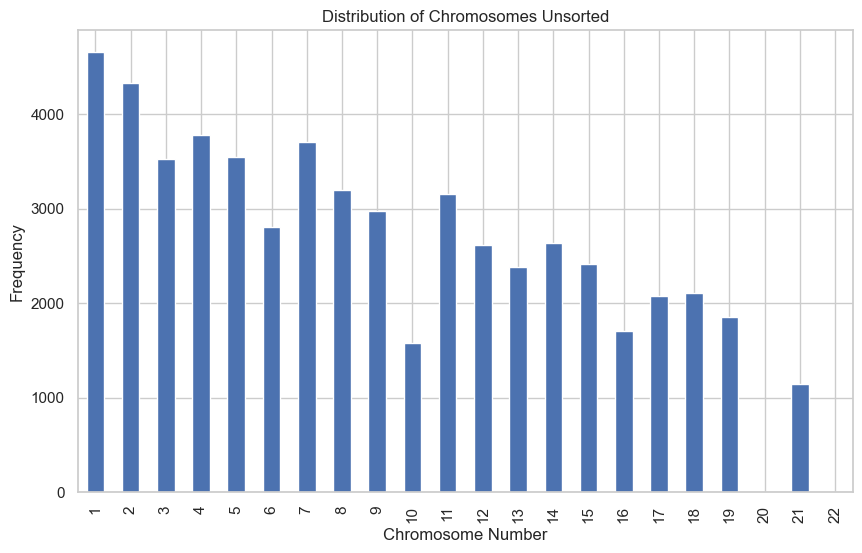

In [137]:
chromosome_val_counts_unsorted = gwas_chromosomes_numer.value_counts().sort_index()
chromosome_val_counts_unsorted.plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Chromosomes Unsorted")
plt.xlabel("Chromosome Number")
plt.ylabel("Frequency")
plt.savefig("chromosome_distribution_unsorted.png")

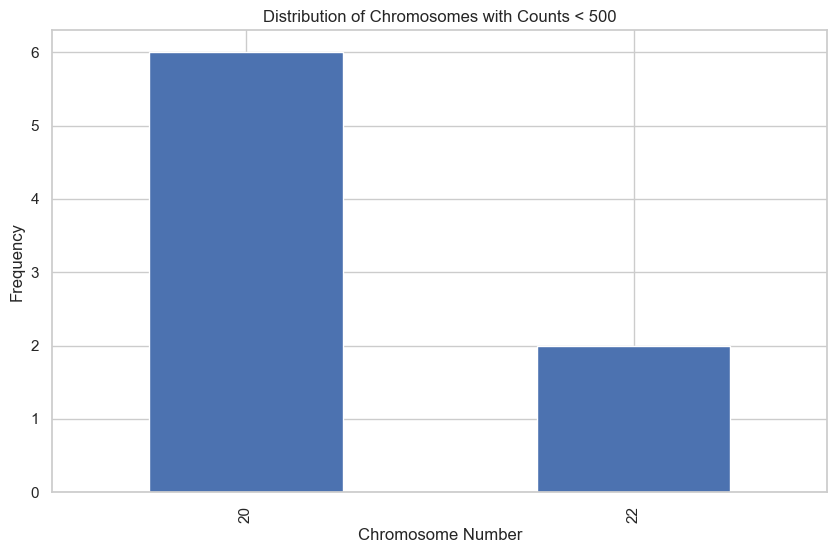

In [138]:
filtered_chromosome_counts = chromosome_val_counts[chromosome_val_counts < 500]
filtered_chromosome_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Chromosomes with Counts < 500")
plt.xlabel("Chromosome Number")
plt.ylabel("Frequency")
plt.savefig("chromosome_distribution_filtered.png")

In [154]:
# Identify rows with duplicated chromosome_position values
duplicated_rows = gwas_df_clean[gwas_df_clean['chromosome_position'].duplicated(keep=False)]
duplicated_rows.to_csv('duplicated_chomosome_position_rows.csv')
duplicated_rows # 136 rows × 61 columns

,chromosome_position,Bgd_Si 350 MeV/n_4,FociPerGy_Si 350 MeV/n_4,Bgd_Si 350 MeV/n_8,FociPerGy_Si 350 MeV/n_8,Bgd_Si 350 MeV/n_24,FociPerGy_Si 350 MeV/n_24,Bgd_Si 350 MeV/n_48,FociPerGy_Si 350 MeV/n_48,Bgd_Ar 350 MeV/n_4,...,Bgd_Fe 600 MeV/n_24.1,FociPerGy_Fe 600 MeV/n_24.1,Bgd_Fe 600 MeV/n_48.1,FociPerGy_Fe 600 MeV/n_48.1,Bgd_X-ray_4.1,FociPerGy_X-ray_4.1,Bgd_X-ray_24.1,FociPerGy_X-ray_24.1,Bgd_X-ray_48.1,FociPerGy_X-ray_48.1
673,1-22367196,0.030504,0.488074,0.003588,0.185874,0.183077,0.415448,0.168249,0.042900,0.049135,...,1.000000,0.837054,0.188642,0.176944,0.496626,0.548846,0.865112,0.589513,0.447234,0.617374
674,1-22367196,0.030504,0.488074,0.003588,0.185874,0.183077,0.415448,0.168249,0.042900,0.049135,...,1.000000,0.837054,0.188642,0.176944,0.496626,0.548846,0.865112,0.589513,0.447234,0.617374
1277,1-34597810,0.167435,0.046658,0.106113,0.575044,0.495170,0.558412,0.058433,0.678784,0.134111,...,0.654735,0.465783,0.900131,0.968721,0.280986,0.599740,0.853064,0.940301,0.320123,0.707923
1278,1-34597810,0.167435,0.046658,0.106113,0.575044,0.495170,0.558412,0.058433,0.678784,0.134111,...,0.654735,0.465783,0.900131,0.968721,0.280986,0.599740,0.853064,0.940301,0.320123,0.707923
1485,1-38007047,0.120664,0.050894,0.634367,0.349753,0.239401,0.024139,0.001239,0.278070,0.008183,...,0.006573,0.000078,0.269356,0.003706,0.188525,0.000410,0.690810,0.002709,0.377402,0.000746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128214,19-40361322,0.086728,0.193945,0.162372,0.767435,0.002095,0.130344,0.752176,0.353959,0.029632,...,0.101738,0.011460,0.171754,0.000450,0.032261,0.000686,0.746062,0.080819,0.019328,0.004765
134312,21-164046333,0.196549,0.283704,0.618828,0.420903,0.458686,0.524801,0.511493,0.949359,0.889607,...,0.144898,0.022083,0.001187,0.821519,0.330200,0.052242,0.035752,0.042191,0.288308,0.057956
134313,21-164046333,0.138723,0.301705,0.338550,0.140722,0.087335,0.676170,0.712747,0.561406,0.356398,...,0.235590,0.069549,0.016986,0.926542,0.525438,0.038190,0.033659,0.025729,0.553237,0.087462
134460,21-169454751,0.657674,0.264208,0.898496,0.424042,0.330298,0.443626,0.443950,0.343830,0.959084,...,0.607831,0.868485,0.000980,0.005755,0.529899,0.674261,0.129332,0.757958,0.581837,0.726181


In [184]:
# Get the pairs of duplicated chromosome_position value rows
matching_groups = gwas_df_clean.groupby('chromosome_position').filter(lambda x: len(x) > 1).groupby('chromosome_position')
pairs = [list(group.index) for _, group in matching_groups]
print(len(pairs), pairs[:5])

68 [[5263, 5264], [5882, 5883], [6354, 6355], [6873, 6874], [9558, 9559]]


In [182]:
# Identify the differences between the duplicated rows
identical_rows = []
mismatched_rows = []
for pair in pairs:
    for i in range(0, len(pair)-1):
        for j in range(i+1, len(pair)):
            row1 = gwas_df_clean.loc[pair[i]]
            row2 = gwas_df_clean.loc[pair[j]]
            
            diff = row1 != row2

            if diff.any():
                differing_cols = diff.index[diff].tolist()
                print(f"Rows {pair[i]} and {pair[j]} differ in {len(differing_cols)} columns")
                mismatched_rows.append(pair[i])
            else:
                identical_rows.append(pair[i])

print("---------------")
print(f"{2*len(mismatched_rows)} rows - {len(mismatched_rows)} pairs have differences")
print(f"{2*len(identical_rows)} rows - {len(identical_rows)} pairs are completely identical")

Rows 118783 and 118784 differ in 60 columns
Rows 12098 and 12099 differ in 60 columns
Rows 15202 and 15203 differ in 60 columns
Rows 134312 and 134313 differ in 60 columns
Rows 25990 and 25991 differ in 60 columns
Rows 60453 and 60454 differ in 60 columns
---------------
12 rows - 6 pairs have differences
124 rows - 62 pairs are completely identical


## Export Cleaned Data

In [106]:
gwas_df_clean.to_csv('../data/processed/gwas_df_clean.csv', index=False)

In [114]:
# Transposed version
gwas_df_clean_transposed = gwas_df_clean.T#.reset_index(drop=True)
gwas_df_clean_transposed.to_csv('../data/processed/gwas_df_clean_transposed.csv', header=False, index=False)